In [2]:
# 🧠 Association Rule Mining - Apriori Algorithm (Full Code)
import pandas as pd
import collections
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# for showing all rows
pd.set_option("display.max_rows", 200)


In [21]:
# STEP 1: Load Dataset
data = pd.read_csv('/Users/omgajipara/Desktop/Data Science/AI:ML/Machine Learning/Unsupervised Learning/Association Rule Learning/groceries.csv')


In [22]:
data

,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,17,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9831,1,cooking chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9832,10,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9833,4,semi-finished bread,bottled water,soda,bottled beer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
'''data['Item 32'] = pd.to_numeric(data['Item 32'], errors='coerce')  # convert to float, set errors as NaN
data['Item 32'] = data['Item 32'].fillna(data['Item 2'].mode().iloc[0])
'''

"data['Item 32'] = pd.to_numeric(data['Item 32'], errors='coerce')  # convert to float, set errors as NaN\ndata['Item 32'] = data['Item 32'].fillna(data['Item 2'].mode().iloc[0])\n"

In [24]:
data

,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,17,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9831,1,cooking chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9832,10,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9833,4,semi-finished bread,bottled water,soda,bottled beer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
data.columns

Index(['Item(s)', 'Item 1', 'Item 2', 'Item 3', 'Item 4', 'Item 5', 'Item 6',
       'Item 7', 'Item 8', 'Item 9', 'Item 10', 'Item 11', 'Item 12',
       'Item 13', 'Item 14', 'Item 15', 'Item 16', 'Item 17', 'Item 18',
       'Item 19', 'Item 20', 'Item 21', 'Item 22', 'Item 23', 'Item 24',
       'Item 25', 'Item 26', 'Item 27', 'Item 28', 'Item 29', 'Item 30',
       'Item 31', 'Item 32'],
      dtype='object')

In [88]:
type(data['Item 5'][0])

float

In [93]:
data

,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,Item 10,Item 11,Item 12,Item 13,Item 14,Item 15,Item 16,Item 17,Item 18,Item 19,Item 20,Item 21,Item 22,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,17,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,whipped/sour cream,flour,coffee,red/blush wine,salty snack,chocolate,hygiene articles,napkins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9831,1,cooking chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9832,10,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,cling film/bags,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9833,4,semi-finished bread,bottled water,soda,bottled beer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
# STEP 2: Preprocess Data - Convert to list of transactions
market = []
for i in range(data.shape[0]):
    customer_items = []
    for j in data.columns:
        item = data.loc[i, j]
        if isinstance(item, str):
            customer_items.append(item)
    market.append(customer_items)

In [100]:
market

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'UHT-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['potted plants'],
 ['whole milk', 'cereals'],
 ['tropical fruit',
  'other vegetables',
  'white bread',
  'bottled water',
  'chocolate'],
 ['citrus fruit',
  'tropical fruit',
  'whole milk',
  'butter',
  'curd',
  'yogurt',
  'flour',
  'bottled water',
  'dishes'],
 ['beef'],
 ['frankfurter', 'rolls/buns', 'soda'],
 ['chicken', 'tropical fruit'],
 ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'],
 ['fruit/vegetable juice'],
 ['packaged fruit/vegetables'],
 ['chocolate'],
 ['specialty bar'],
 ['other vegetables'],
 ['butter mi

In [104]:
'''flat_list = []

def flatten(sublist):
    for item in sublist:
        if isinstance(item, list):  # If the item is a list, recurse into it
            flatten(item)
        else:
            flat_list.append(item)  # If it's not a list (i.e., a string), append it to fla

flatten(market)  # Flatten the market list
print(flat_list)  # Output the flattened list
'''

"flat_list = []\n\ndef flatten(sublist):\n    for item in sublist:\n        if isinstance(item, list):  # If the item is a list, recurse into it\n            flatten(item)\n        else:\n            flat_list.append(item)  # If it's not a list (i.e., a string), append it to fla\n\nflatten(market)  # Flatten the market list\nprint(flat_list)  # Output the flattened list\n"

In [ ]:
# STEP 3: Count Item Frequencies
flat_list = [item for sublist in market for item in sublist]
item_counts = collections.Counter(flat_list)

In [78]:
# Create frequency DataFrame
df_items = pd.DataFrame({
    'Item Name': list(item_counts.keys()),
    'Frequency': list(item_counts.values())
}).sort_values(by='Frequency', ascending=False)

In [ ]:
#!/bin/bash

# Create README.md
cat <<EOL > README.md
# Association Rule Mining - Apriori Algorithm

This project demonstrates the implementation of the Apriori algorithm for association rule mining using Python. The notebook processes a dataset of grocery transactions to identify frequent itemsets and generate association rules.

## Steps in the Notebook

1. **Import Libraries**:
    - Import necessary libraries such as pandas, matplotlib, seaborn, and mlxtend for preprocessing, frequent pattern mining, and visualization.

2. **Load Dataset**:
    - Load the dataset \`groceries.csv\` containing grocery transactions.

3. **Explore Dataset**:
    - Display the dataset and its structure to understand the data.

4. **Preprocess Data**:
    - Convert the dataset into a list of transactions where each transaction is a list of items purchased by a customer.

5. **Count Item Frequencies**:
    - Flatten the list of transactions and count the frequency of each item using Python's \`collections.Counter\`.

6. **Visualize Top Items**:
    - Plot the top 15 most frequent items using a bar chart.

7. **One-Hot Encoding**:
    - Use \`TransactionEncoder\` to convert the list of transactions into a one-hot encoded DataFrame.

8. **Apply Apriori Algorithm**:
    - Use the Apriori algorithm to find frequent itemsets with a minimum support threshold of 0.03.

9. **Generate Association Rules**:
    - Generate association rules from the frequent itemsets using metrics like lift and confidence.

10. **Visualize Rules**:
     - Create a scatter plot to visualize the association rules based on support, confidence, and lift.

## Requirements

- Python 3.x
- Libraries:
  - pandas
  - matplotlib
  - seaborn
  - mlxtend

## How to Run

1. Clone the repository or download the notebook.
2. Install the required libraries using pip:
    \`\`\`bash
    pip install pandas matplotlib seaborn mlxtend
    \`\`\`
3. Place the \`groceries.csv\` dataset in the same directory as the notebook.
4. Open the notebook in Jupyter and execute the cells sequentially.

## Output

- Frequent itemsets with their support values.
- Association rules with metrics like support, confidence, and lift.
- Visualizations of item frequencies and association rules.

## Dataset

The dataset \`groceries.csv\` contains transactional data where each row represents a customer's purchase.

## License

This project is for educational purposes only.
EOL

echo "README.md has been created successfully."


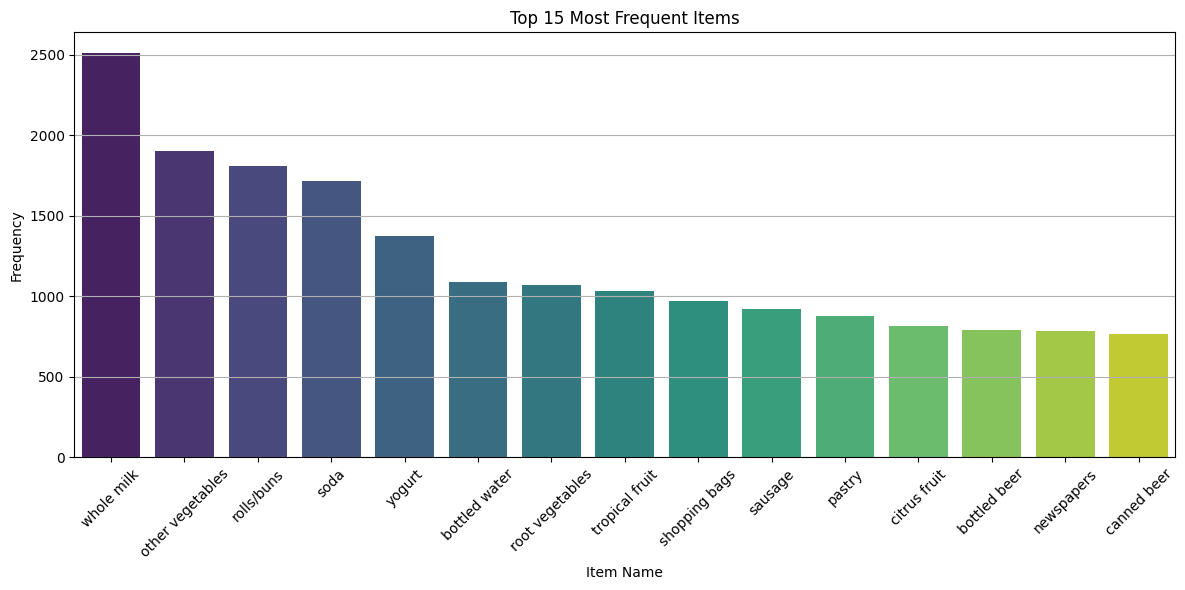

In [79]:
# Plot top 15 items without warning
plt.figure(figsize=(12,6))
sns.barplot(data=df_items.head(15), x='Item Name', y='Frequency', hue='Item Name', palette='viridis', dodge=False, legend=False)
plt.title("Top 15 Most Frequent Items")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show=

In [80]:

# STEP 4: One-Hot Encoding using TransactionEncoder
tr = TransactionEncoder()
te_ary = tr.fit(market).transform(market)
df_encoded = pd.DataFrame(te_ary, columns=tr.columns_)


In [81]:
#STEP 5: Apriori Algorithm to find frequent itemsets
frequent_items = apriori(df_encoded, min_support=0.03, use_colnames=True, max_len=3)
frequent_items = frequent_items.sort_values(by='support', ascending=False)

print("\n🛒 Top Frequent Itemsets:\n")
print(frequent_items.head())



🛒 Top Frequent Itemsets:

     support            itemsets
42  0.255516        (whole milk)
26  0.193493  (other vegetables)
30  0.183935        (rolls/buns)
35  0.174377              (soda)
43  0.139502            (yogurt)


In [82]:
# STEP 6: Generate Association Rules
rules = association_rules(frequent_items, metric="lift", min_threshold=1)
rules = rules.sort_values(by='confidence', ascending=False)

print("\n🔗 Top Association Rules:\n")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())




🔗 Top Association Rules:

             antecedents         consequents   support  confidence      lift
27  (whipped/sour cream)        (whole milk)  0.032232    0.449645  1.759754
7      (root vegetables)        (whole milk)  0.048907    0.448694  1.756031
9      (root vegetables)  (other vegetables)  0.047382    0.434701  2.246605
15      (tropical fruit)        (whole milk)  0.042298    0.403101  1.577595
5               (yogurt)        (whole milk)  0.056024    0.401603  1.571735


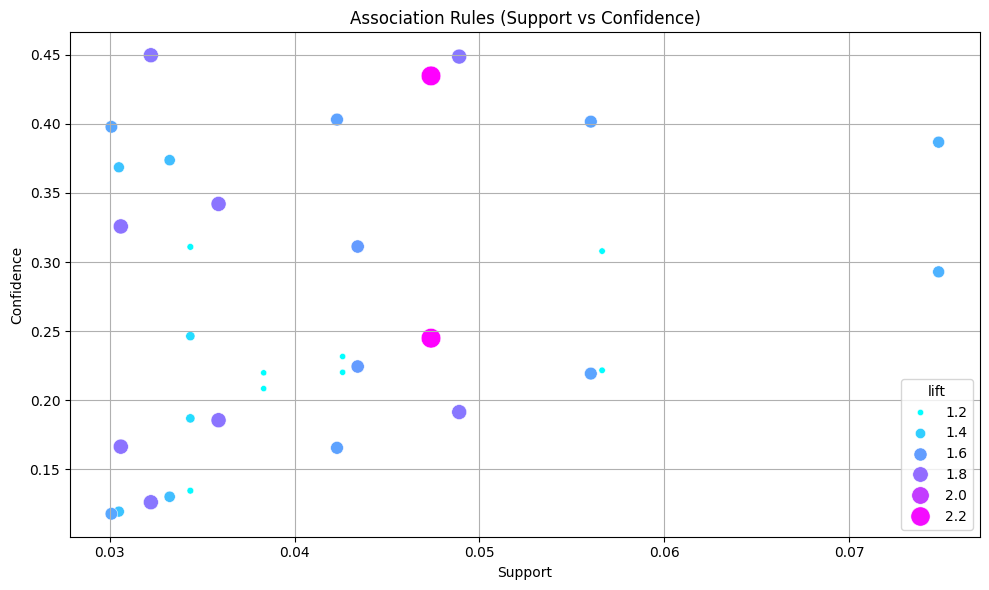

In [83]:
# STEP 7: Visualize Rules - Support vs Confidence with Lift
plt.figure(figsize=(10,6))
sns.scatterplot(data=rules, x='support', y='confidence', size='lift', hue='lift', palette='cool', sizes=(20, 200))
plt.title("Association Rules (Support vs Confidence)")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.grid(True)
plt.tight_layout()
plt.show()